## Data Preparation

In [1]:
import torchvision.datasets as datasets 
import torchvision.transforms as T


# === data transformation === # 
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])


train_T = T.Compose([   T.RandomResizedCrop(224),
                        T.RandomHorizontalFlip(), 
                        T.ToTensor(), 
                        normalize,
                    ])

test_T = T.Compose([T.Resize(256),
                    T.CenterCrop(224),
                    T.ToTensor(),
                    normalize,
                    ])                  


# === dataset object === # 
train_dataset = datasets.ImageFolder(   root= './train',
                                        transform= train_T, 
                                    )

test_dataset = datasets.ImageFolder(    root= "./val", 
                                        transform= test_T,
                                    )                                


## Data Batching 

In [2]:
from torch.utils.data import DataLoader, distributed

if_distributed = False 

if if_distributed:
    train_sampler = distributed.DistributedSampler(train_dataset)   # for distributed GPU (https://subinium.github.io/pytorch-dataloader/)
                                                                    # use with 'torch.nn.parallel.DistributedDataParallel'
else: 
    train_sampler = None
    
    
        
train_loader = DataLoader(   train_dataset,
                            batch_size=32, 
                            shuffle = (train_sampler is None), 
                            num_workers=4, 
                            pin_memory=True, 
                            sampler=train_sampler,
                        )

val_loader = DataLoader( test_dataset,
                        batch_size=32,
                        shuffle=False,
                        num_workers=4,
                        pin_memory=True,
                        )                        

## Data Showing 

In [3]:
images_batch, labels_batch = iter(train_loader).next()

print(type(images_batch[0]))
print(images_batch[0].size())
print(labels_batch[0])

<class 'torch.Tensor'>
torch.Size([3, 224, 224])
tensor(190)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


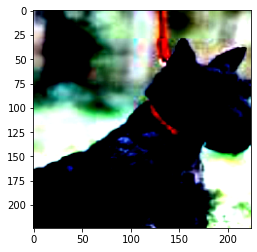

In [4]:
import matplotlib.pyplot as plt 

plt.imshow(images_batch[0].permute(1, 2, 0)) # (C, H, W) -> (H, W, C) for visualization